In [146]:
import pandas as pd

In [147]:
colors_df = pd.read_csv("data/colors.csv")

In [148]:
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [149]:
colors_df["rgb"].count()

np.int64(135)

In [150]:
colors_df.nunique()

,0
id,135
name,135
rgb,124
is_trans,2


In [151]:
colors_df.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [152]:
import matplotlib.pyplot as plt

In [153]:
sets_df = pd.read_csv("data/sets.csv")

In [154]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [155]:
sets_by_year = sets_df.groupby("year").count()
sets_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


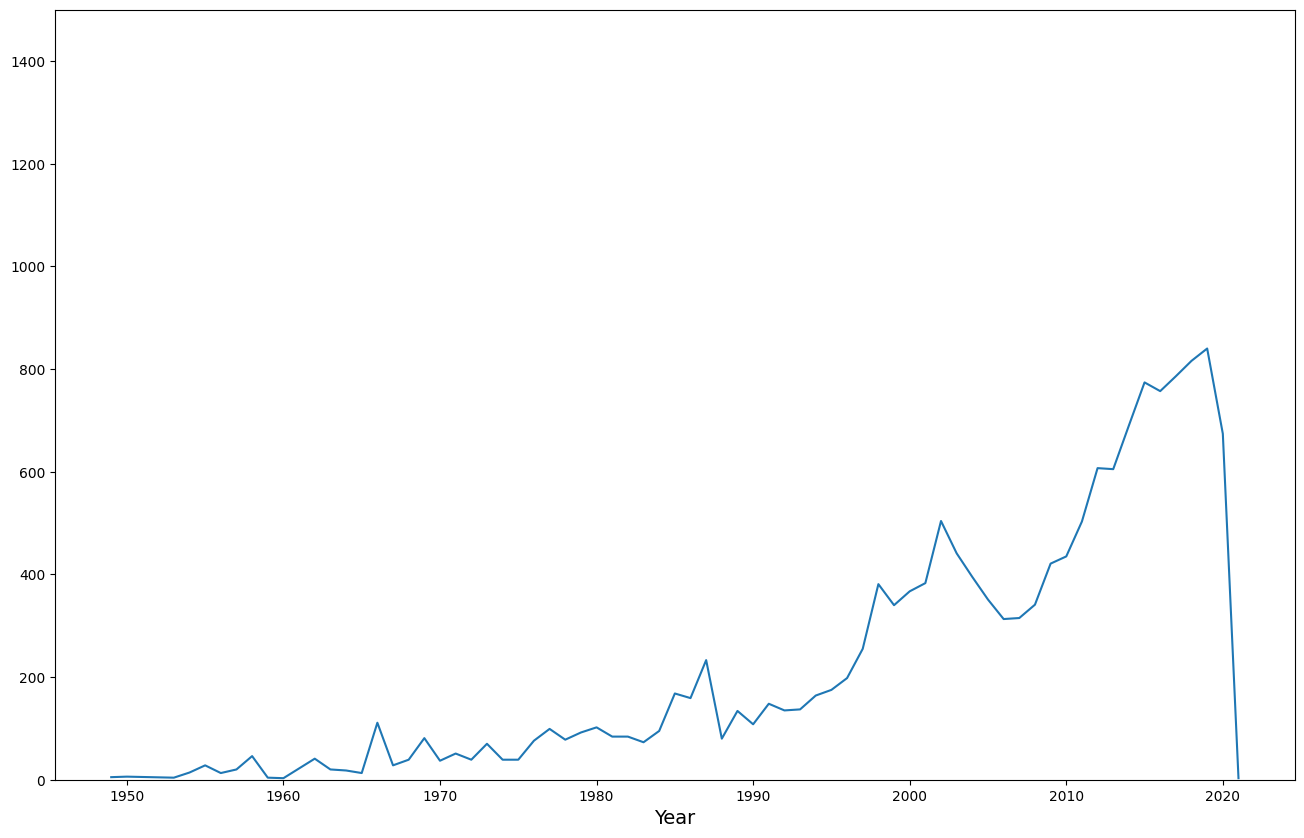

In [156]:
plt.figure(figsize=(16,10))
plt.xlabel("Year", fontsize=14)
plt.ylim(0, 1500)
plt.plot(sets_by_year.index, sets_by_year.num_parts)

In [157]:
sets_df = sets_df.drop(axis=0, index=sets_df[sets_df['year']>2019].index)

In [158]:
sets_groupby_year = sets_df.groupby('year').agg({"theme_id":pd.Series.nunique,"set_num":pd.Series.nunique})
sets_groupby_year.index.max()

np.int64(2019)

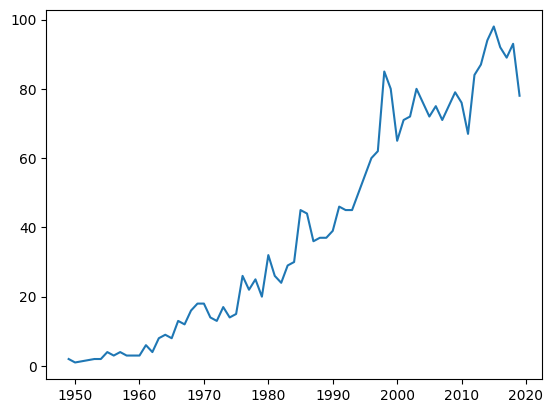

In [159]:
plt.plot(sets_groupby_year.index, sets_groupby_year.theme_id)

Text(0, 0.5, 'Number of Eet')

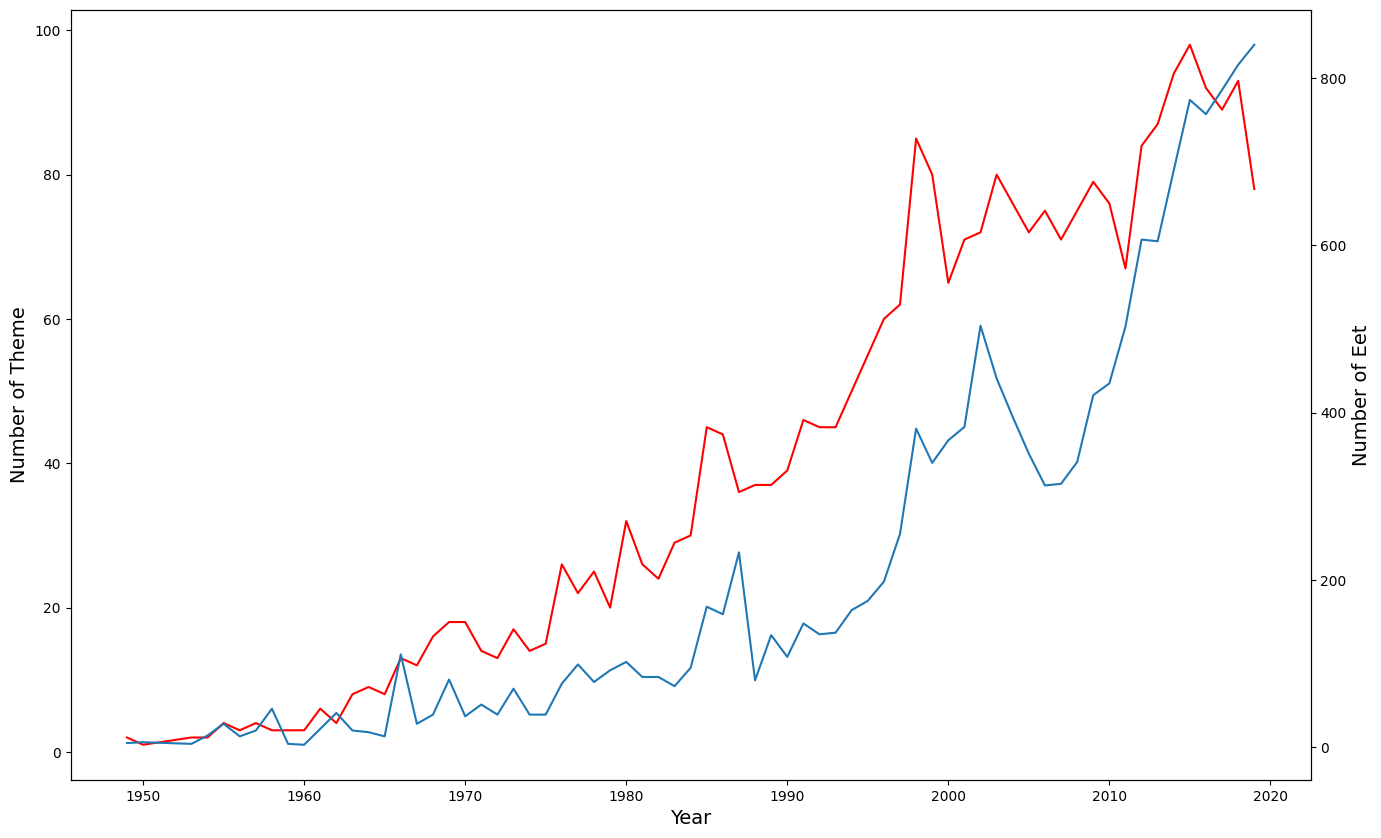

In [160]:
plt.figure(figsize=(16,10))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_groupby_year.index, sets_groupby_year.theme_id, color="red")
ax2.plot(sets_groupby_year.index, sets_groupby_year.set_num)

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Number of Theme", fontsize=14)
ax2.set_ylabel('Number of Eet', fontsize=14)

In [161]:
parts_per_set = sets_df.groupby("year").agg({"num_parts": pd.Series.mean})
parts_per_set.rename(columns = {"num_parts":"num_parts Avarage"}, inplace=True)

In [162]:
parts_per_set.tail()

,num_parts Avarage
year,
2015,191.379845
2016,209.920740
2017,221.840967
2018,213.618873
2019,207.510714


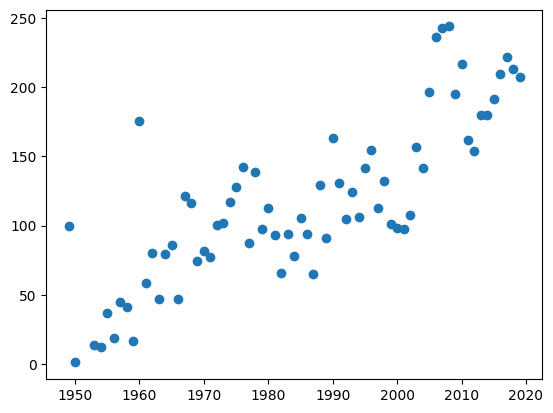

In [163]:
plt.scatter(parts_per_set.index, parts_per_set["num_parts Avarage"])

<img src="https://i.imgur.com/Sg4lcjx.png">


In [165]:
themes_df = pd.read_csv("data/themes.csv")

In [166]:
themes_df.tail()

,id,name,parent_id
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0
595,709,LEGO Art,NaN


In [168]:
themes_df[themes_df.name == "Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [172]:
set_theme_count = sets_df["theme_id"].value_counts()

In [184]:
set_theme_count[:5]

,count
theme_id,
158,713
501,624
494,346
505,328
435,314


In [185]:
set_theme_count = pd.DataFrame({"id":set_theme_count.index, "set_count":set_theme_count.values})

In [186]:
set_theme_count.tail()

,id,set_count
556,34,1
557,510,1
558,515,1
559,455,1
560,414,1


In [187]:
merged_df = pd.merge(set_theme_count, themes_df, on="id")

In [188]:
merged_df.tail()

,id,set_count,name,parent_id
556,34,1,Building,23.0
557,510,1,Boat,507.0
558,515,1,Dinosaurs,507.0
559,455,1,Classic Town,454.0
560,414,1,Castle,411.0


In [190]:
merged_df.sort_values("set_count")

,id,set_count,name,parent_id
550,361,1,Skull Spiders,324.0
549,156,1,Mini,155.0
546,368,1,HO 1:87 Vehicles,365.0
547,212,1,Classic Basic,207.0
551,380,1,Train,373.0
...,...,...,...,...
4,435,314,Ninjago,NaN
3,505,328,Basic Set,504.0
2,494,346,Friends,NaN
1,501,624,Gear,NaN


<BarContainer object of 10 artists>

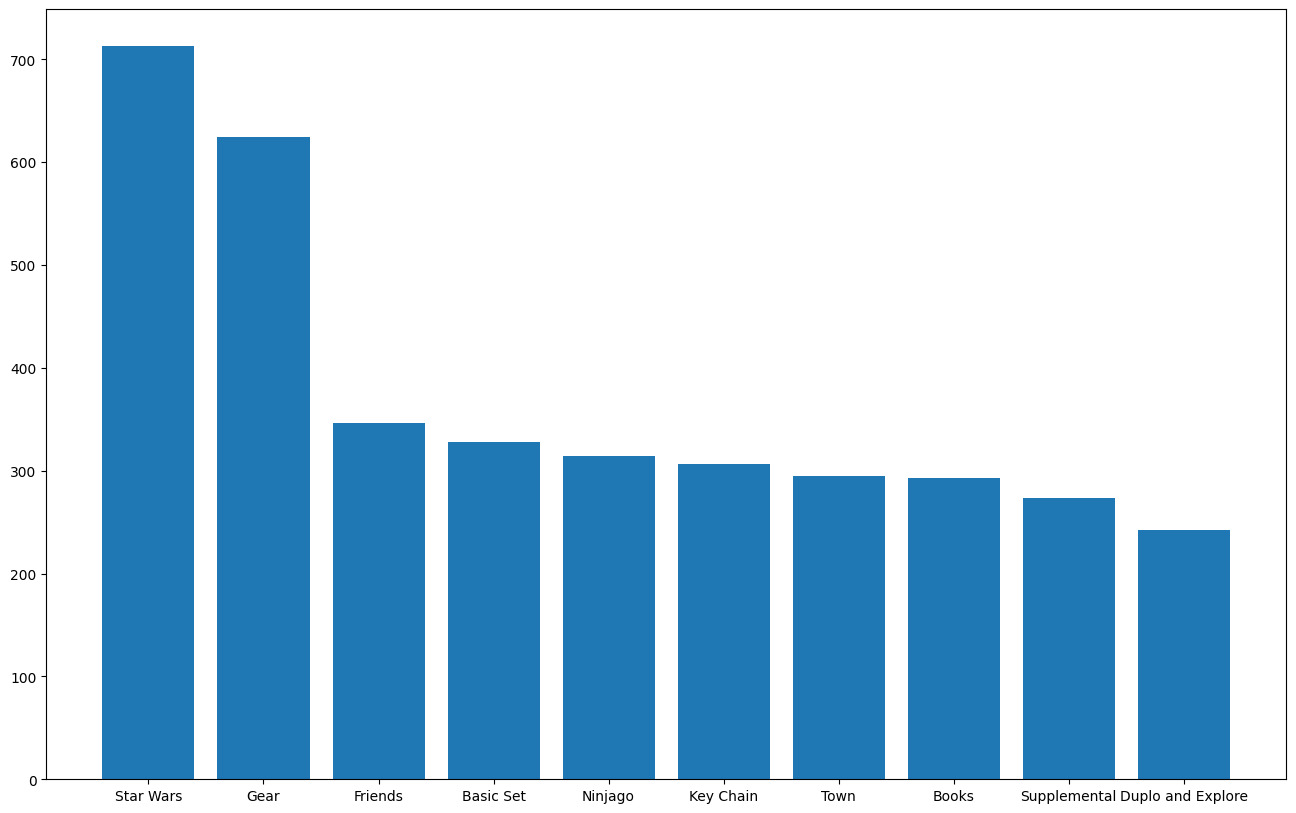

In [192]:
plt.figure(figsize=(16,10))
plt.bar(merged_df.name[:10], merged_df.set_count[:10])
